<a href="https://colab.research.google.com/github/isacmoura/FLISOL2019-introducao-ao-pytorch/blob/master/Copy_of_minicurso_pytorch_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando os pacotes necessários

In [1]:
# Primeiro, vamos baixar um arquivo para simplificar o processo de "plot" das imagens
!wget https://raw.githubusercontent.com/isacmoura/pytorch_scholarship_challenge/master/lesson4/helper.py

--2019-04-27 12:59:57--  https://raw.githubusercontent.com/isacmoura/pytorch_scholarship_challenge/master/lesson4/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2019-04-27 12:59:57 (52.4 MB/s) - ‘helper.py’ saved [2813/2813]



In [2]:
!ls

helper.py  sample_data


In [0]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
# Para renderizar as figuras diretamente no notebook
%matplotlib inline
# Para renderizar as figuras com a resolução máxima
%config InlineBackend.figure_format = 'retina'

# Importamos nosso arquivo de ajuda para abstrair conceitos desnecessários neste momento
import helper

Agora iremos construir nossa rede neural para identificar dígitos em uma imagem.

O dataset utilizado será o MNIST, que já é provido pela biblioteca que estamos utilizando. O dataset consiste em dígitos manuscritos em escala de cinza. Cada imagem é 28x28 pixels.

Vamos importar nosso dataset e realizar algumas transformações.

In [9]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize([0.5], [0.5])])

# Dataset de treino
trainset = datasets.FashionMNIST('~/pytorch/FMINST', download=True,
                                 transform=transform, train=True)
trainloader = torch.utils.data.DataLoader(trainset,  batch_size=64,
                                          shuffle=True)

# Dataset de teste
testset = trainset = datasets.FashionMNIST('~/pytorch/FMINST', download=True,
                                           transform=transform, train=False)
testloader = torch.utils.data.DataLoader(testset,  batch_size=64,
                                         shuffle=True)

0it [00:00, ?it/s]

26427392it [00:01, 13713682.74it/s]                             


Extracting /root/pytorch/FMINST/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 99395.01it/s]                            
0it [00:00, ?it/s]

Extracting /root/pytorch/FMINST/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:01, 4065918.66it/s]                             
0it [00:00, ?it/s]

Extracting /root/pytorch/FMINST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 33841.82it/s]            

Extracting /root/pytorch/FMINST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


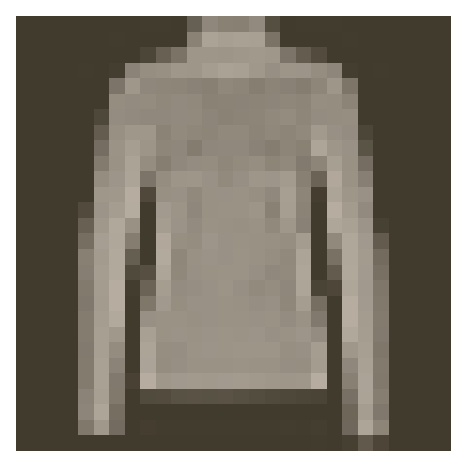

In [12]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

# Criando nossa rede neural

Agora vamos definir nossa rede.

Cada imagem é 28x28, resultando 784 pixels, e há 10 classes. 

Brinque um pouco e inclua uma camada oculta, pelo menos. Para função de ativação, use as ativações ReLU para as camadas.

Cabe a você quantas camadas você adiciona e o tamanho dessas camadas.

In [0]:
from torch import nn, optim
import torch.nn.functional as F

In [0]:
class Rede(nn.Module):
  # usado para inicializar o objeto quando vai criar uma instância daquela classe (semelhante ao construtor)
  def __init__(self):
    super().__init__()
    
    # Adicione mais cadamas ocultas, se quiser tentar melhorar a performance
    self.input = nn.Linear(784, 128)
    self.hl1 = nn.Linear(128, 64)
    self.output = nn.Linear(64, 10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = self.input(x)
    x = F.relu(x)
    x = self.hl1(x)
    x = F.relu(x)
    x = F.log_softmax(self.output(x), dim=1)

    return x

# Hora de treinar

Iremos utilizar algo chamado criterion, uma métrica para calcular o quanto nosso algoritmo está errando (Função de perca).

Também utilizaremos um otimizador.

## Os quatro passos de uma rede neural


1. Realizar um passo adiante para obter os logits.
2. Utilizar estes logits para calcular a perda.
3. Realizar uma passagem para trás (backward pass) através da rede com loss.backward() para calcular os gradientes.
4. Atualizar os pesos com o otimizador.



In [0]:
model = Rede()

#Troque a loss function e o otimizador e veja o que acontece com a performance
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.03)

In [24]:
model

Rede(
  (input): Linear(in_features=784, out_features=128, bias=True)
  (hl1): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [25]:
# Baixe ou suba o número de épocas
epochs = 5

for e in range(epochs):
  running_loss = 0
  
  for images, labels in trainloader:
    # Limpar os gradientes
    optimizer.zero_grad()

    # Forward
    saida = model(images)
    # Perda
    perca = criterion(saida, labels)
    # passo pra tras
    perca.backward()
    # otimizar os pesos
    optimizer.step()
    running_loss += perca.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.7183913413141327
Training loss: 0.4596957409623335
Training loss: 0.4099561448639898
Training loss: 0.38224119743876367
Training loss: 0.36055089609582286


Sua vez! Agora iremos, desenhar as predições realizadas do algoritmo construído

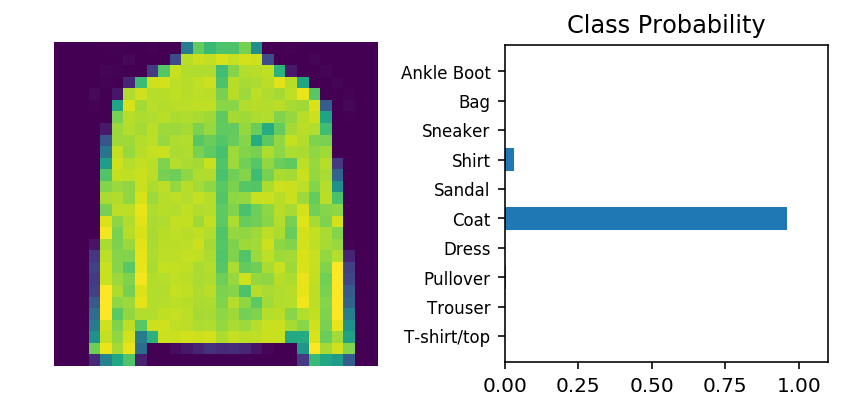

In [27]:
# Testar

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# Converter 2D para um vetor 1D
img = img.resize_(1, 784)

# Passa a imagem através da rede
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')